In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import pandas as pd

In [ ]:

import sys
sys.path.append('/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/DBSpace/src')

from DBSpace.utils import spot_check
from DBSpace.utils import nestdict


In [12]:
def stim_plot(ts,Fs):
    plt.figure()
    plt.subplot(211)
    plt.plot(np.linspace(0,ts.shape[0]/Fs,ts.shape[0]),ts)
    
    plt.subplot(212)
    F,Pxx = sig.welch(ts,fs=Fs,nfft=2**15,nperseg=2**10,noverlap=2**10-5)
    plt.plot(F,(Pxx),linewidth=5,label='Sampled')
    #plt.xlim((0,500))
    
    return F

def raw(timeseries):
    stim_plot(timeseries[:,1],Fs=1e6)
    
def decimated(timeseries, factor=100):
    if factor == 1:
        ds_stim = timeseries[0:70000,1]    
    else:
        ds_stim = sig.decimate(timeseries[0:70000,1],q=factor)
        
    print(stim_plot(ds_stim,Fs=1e6/factor))

def empirical(fname):
    _ = 


In [16]:
# Relevant Files
ipg_infile = '../assets/data/stim_waveform/ssipgwave_vreg_Ra1p1kOhm_1usdt.txt'
sample_voltage_sweep = '/home/virati/MDD_Data/Benchtop/VRT_Impedance_RB/Session_2018_04_24_Tuesday/demo_2018_04_24_16_53_36__MR_0.txt'

[0.00000000e+00 6.10351562e+00 1.22070312e+01 ... 9.99877930e+04
 9.99938965e+04 1.00000000e+05]


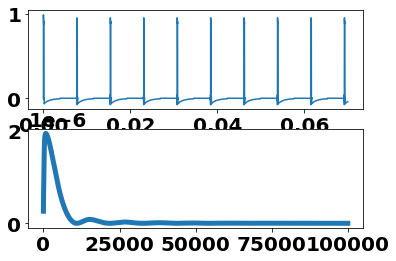

In [14]:
synthetic_waveform = np.array(pd.read_csv(ipg_infile,sep=',',header=None))
decimated(synthetic_waveform, factor=5)

/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/DBSpace/src/DBSpace/utils/spot_check.py:256: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  #pdb.set_trace()
/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/DBSpace/src/DBSpace/utils/spot_check.py:256: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  #pdb.set_trace()


{'TS': {'Left': array([ 1.10935770e+00,  3.54047813e+00,  4.64677368e+00, ...,
         -7.38568613e-03, -1.93243715e-03, -5.77374368e-03]),
  'Right': array([ 1.11074332e+00,  3.55132721e+00,  4.67107894e+00, ...,
         -9.10478045e-03,  5.98016919e-03,  4.58835027e-03])},
 'TF': {'SG': defaultdict(<function DBSpace.utils.nestdict()>,
              {'Left': array([[1.67697249e-07, 2.79568899e-07, 2.29228834e-07, ...,
                       1.68759515e-09, 7.49120106e-12, 6.30746967e-10],
                      [9.40859549e-07, 1.05318834e-06, 9.19113547e-07, ...,
                       7.27828391e-07, 7.39703609e-07, 8.03348239e-07],
                      [2.99939175e-06, 2.89452366e-06, 2.72967023e-06, ...,
                       3.77073971e-06, 3.80271135e-06, 3.87343818e-06],
                      ...,
                      [5.61601509e-18, 3.09076162e-17, 1.50957958e-18, ...,
                       5.06119936e-18, 6.97669106e-18, 2.74143254e-18],
                      [1.7578568

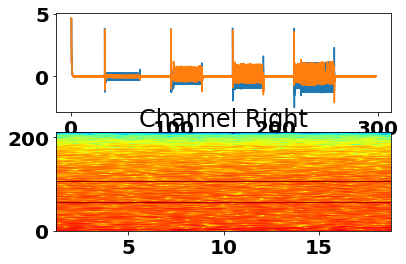

In [17]:
_ = spot_check.spot_check(sample_voltage_sweep,tlims=(10,30),plot_sg=True)